# Title: Exploratory Data Analysis on Netflix Customer Churn using Python
1. Problem Statement: To understand the factors the result in customer churning and how are the patterns, behaviours different from the retained customers.
2. What does Data Represents: The dataset contains Netflix users' information such as their subscription, account acitivty, content type, demographic information and a churn column which indicates whether or not the customer has left the platform.
3. Target Variable: A binary variable named Churn where 1 represents churned and 0 indicates retained customers.
4. What kind of insights are useful? :
a. What are the characteristics of a customer who has churned?
b. How do demographic factors influence churn?
c. Does subscription type and content type retains cutomers?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
## no null values
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [ ]:
## There are no null values and all the variables are in accurate data type format
## Take a copy of the dataset and drop the cutomer ID column
df_cus = df.copy()

In [ ]:
## churned = 1 the customer no longer uses Netflix
## churned = 0 the customer is still using Netflix

## Replace 1 to Yes and 0 to No

df_cus['churn'] = df_cus['churned'].replace({1:'Yes', 0:'No'})
df_cus.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churn
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,Yes
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,Yes
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,No
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,Yes
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,Yes


In [ ]:
## drop the customer ID and Churned columns
df_cus.drop(['customer_id','churned'], axis=1, inplace=True)
df_cus.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churn
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Gift Card,1,0.49,Action,Yes
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Gift Card,5,0.03,Sci-Fi,Yes
2,27,Female,Standard,16.32,10,Asia,TV,13.99,Crypto,2,1.48,Drama,No
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Crypto,2,0.35,Horror,Yes
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Crypto,2,0.13,Action,Yes


In [ ]:
### total churn vs non-churned customers
df_cus['churn'].value_counts()

,count
churn,
Yes,2515
No,2485


In [ ]:
df_cus.describe()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,5.000000,98.420000


# Insights:
1. The data across all the quantitative varibales look accurate.
2. The only abnormality is observed in avg_watch_time_per_day, this column has max 98.42 hr/day. Assuming that the unit of measurement is hours, this is impossible.  A potential misinformation which should be checked.

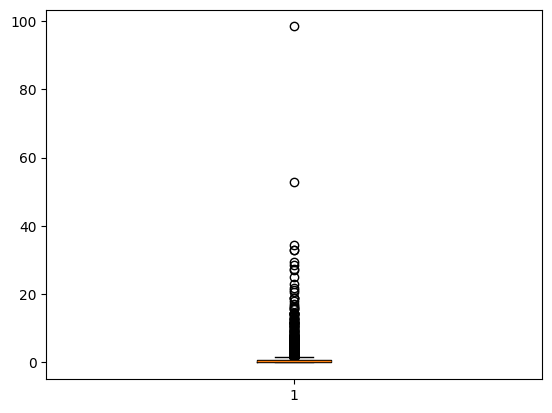

In [ ]:
plt.boxplot(df_cus['avg_watch_time_per_day'])
plt.show()

<Axes: xlabel='avg_watch_time_per_day', ylabel='Count'>

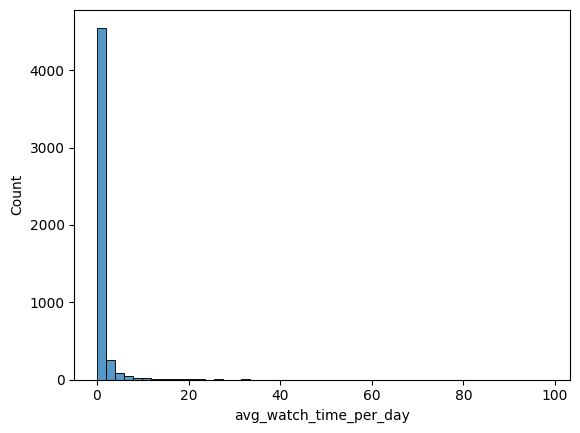

In [ ]:
import seaborn as sns
sns.histplot(df['avg_watch_time_per_day'], bins=50)

### The histogram is right-skewed, which is expected. There are rows with more than 24 hours which should be further checked.
1. Use the quantile function to check the lower and the upper bounds for the avg_watch_time_per_day column
2. IF the number of rows is less than 2-3% of the dataset, then delete the rows
2. If not, then create another column to flag these values. Fill the values > the upper bound with median value(since data is skewed)

In [ ]:
## check the top 0.05% of data
lower_bound = df_cus['avg_watch_time_per_day'].quantile(0.01)## for bottom 1%
upper_bound = df_cus['avg_watch_time_per_day'].quantile(0.99) ## for top 1%
print(lower_bound, upper_bound)

0.0 10.921600000000035


In [ ]:
watch_time_ouliers = df_cus[df_cus['avg_watch_time_per_day']>upper_bound]
watch_time_ouliers.shape

(50, 13)

In [ ]:
print('The outliers accounts to {}% of the dataset'.format((watch_time_ouliers.shape[0]/ df_cus.shape[0])*100))

The outliers accounts to 1.0% of the dataset


In [ ]:
## cap the rows where data is > upper bound
df_cus = df_cus[(df_cus['avg_watch_time_per_day']<upper_bound)]

In [ ]:
df_cus.shape

(4950, 13)

In [ ]:
df_cus.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churn
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Gift Card,1,0.49,Action,Yes
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Gift Card,5,0.03,Sci-Fi,Yes
2,27,Female,Standard,16.32,10,Asia,TV,13.99,Crypto,2,1.48,Drama,No
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Crypto,2,0.35,Horror,Yes
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Crypto,2,0.13,Action,Yes


In [ ]:
cat_variables = [col for col in df_cus.columns if df_cus[col].dtype =='O' ]
num_variables = [col for col in df_cus.columns if df_cus[col].dtype !='O' ]


## Univariant Analysis

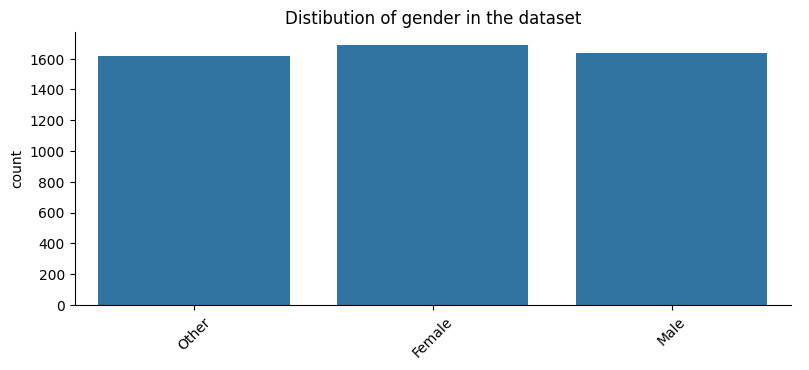

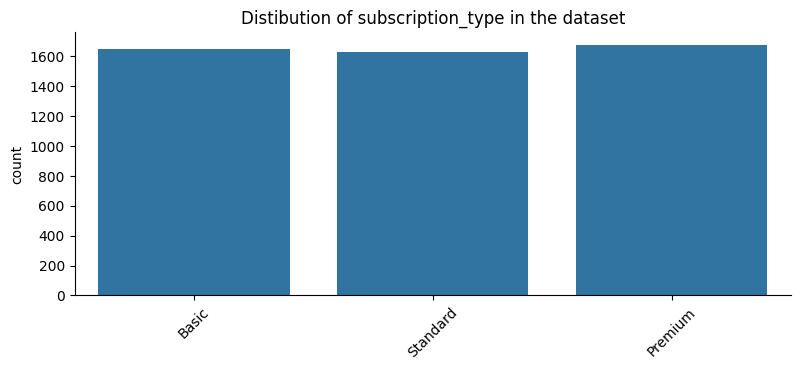

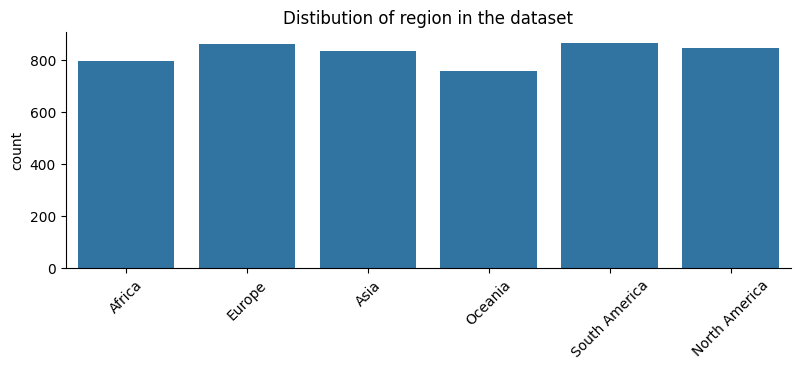

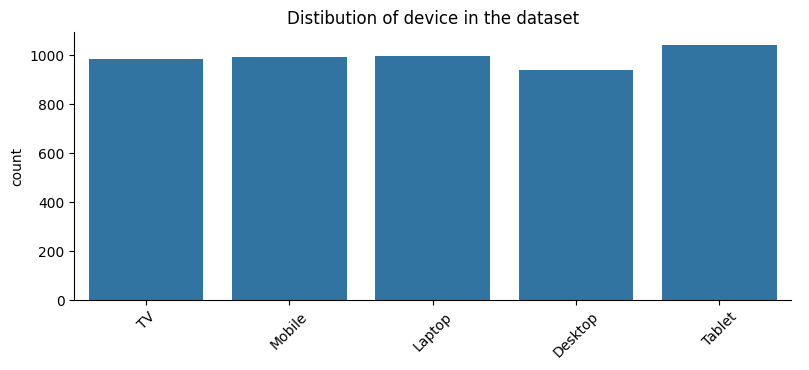

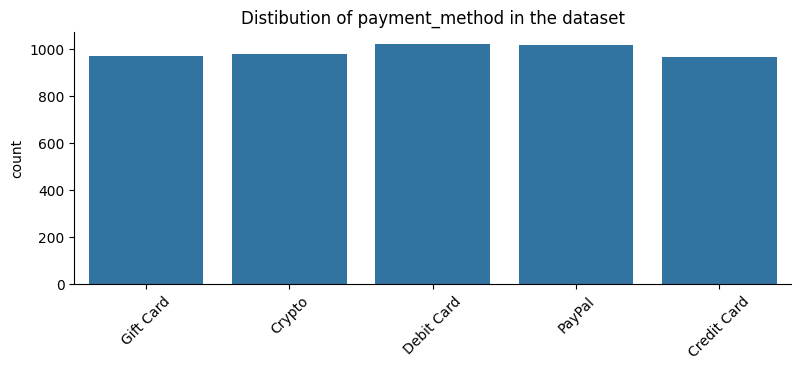

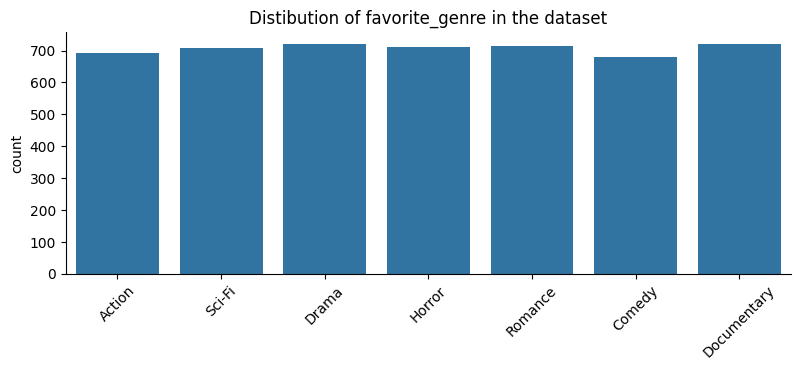

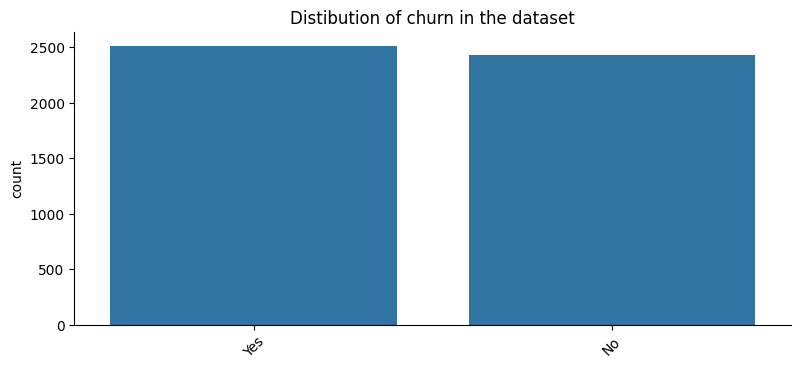

In [ ]:
for col in cat_variables:

  sns.catplot(x=col, kind='count', data=df_cus, height =4, aspect =2)
  plt.title('Distibution of {} in the dataset'.format(col))
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.xlabel('')
  plt.show()

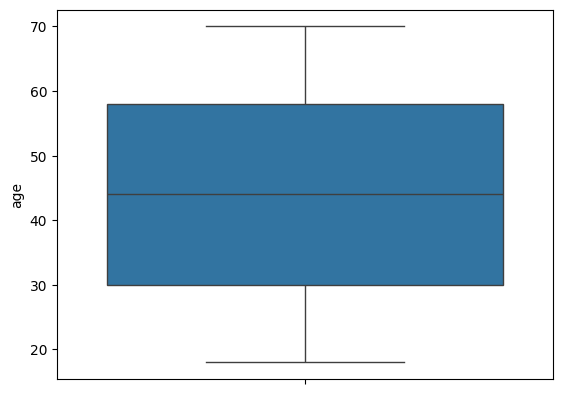

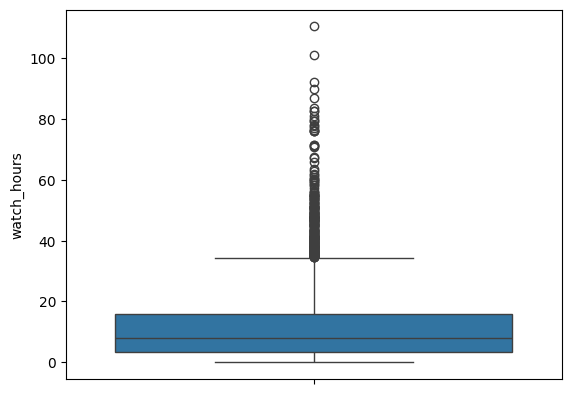

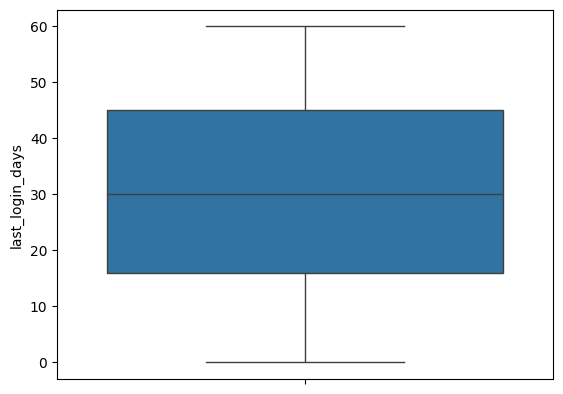

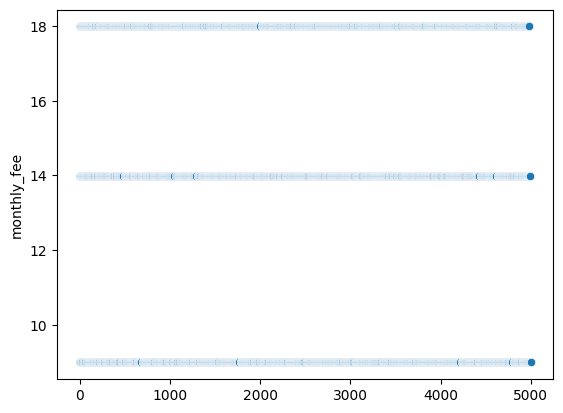

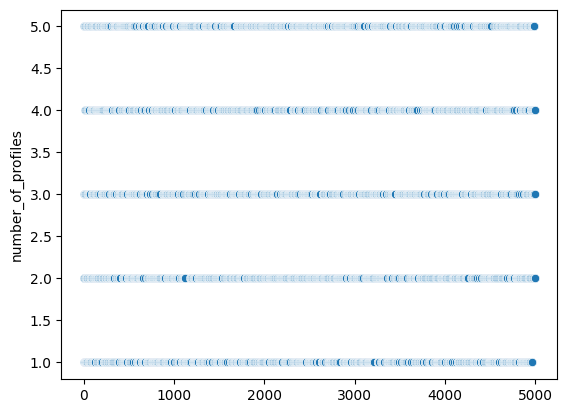

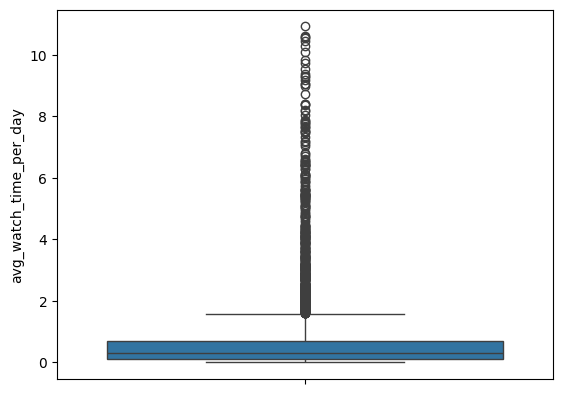

In [ ]:
for col in num_variables:
  if ((col != 'monthly_fee') and (col!= 'number_of_profiles')):
    sns.boxplot(df_cus[col])
  else:
    sns.scatterplot(df_cus[col])
  plt.show()

## Insights

1. The median age of customer is 44 in the dataset.
2. The median of watch hours / month is 0.8 hr, which is quite low. The dataset contains customers whose watch time is relatively lower. Although there are many outliers.
3. The median last_login_day is 30 days.
4. Average watch_time_per_Day is  0.04-0.05 hr/day.

Regardless of whether or not a customer has churned, it can be concluded that the customers in this dataset on average are not active watchers/do not engage frequently with the platform.

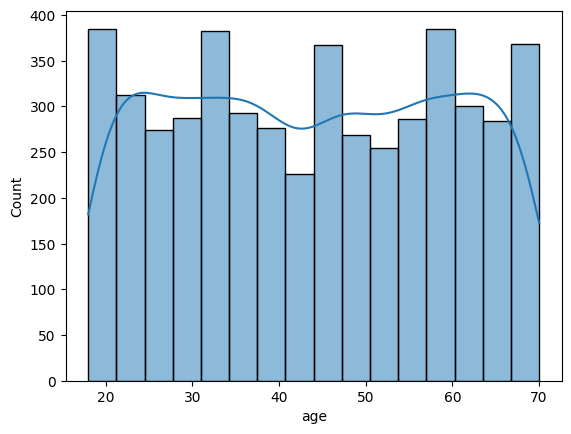

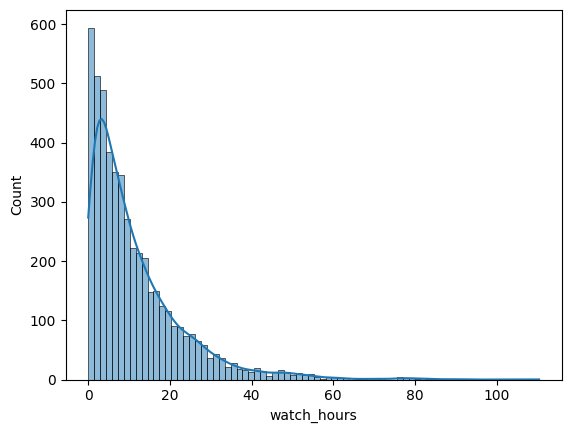

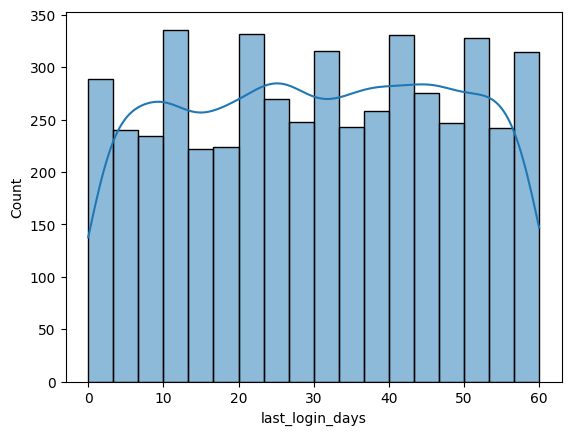

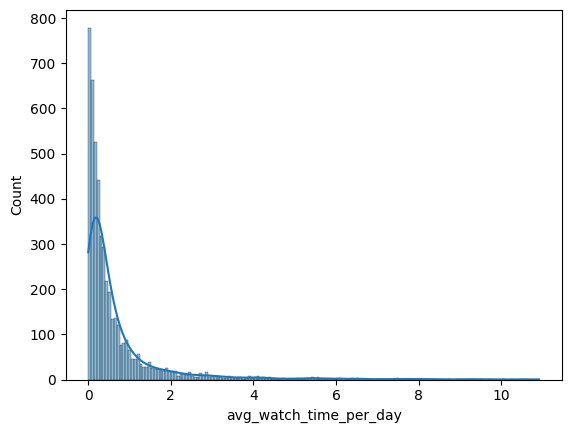

In [ ]:
for col in num_variables:
  if ((col != 'monthly_fee') and (col!= 'number_of_profiles')):

    sns.histplot(df_cus[col], kde=True, fill=True)
    plt.show()

## Histogram analysis
1. The age and last login_dates are uniformly distributed.
2. watch hours and avg watch time per day are right-skewed, which is expected.

In [ ]:
df_cus['churn'].value_counts(normalize=True)

,proportion
churn,
Yes,0.508081
No,0.491919


## Bivariant Analysis

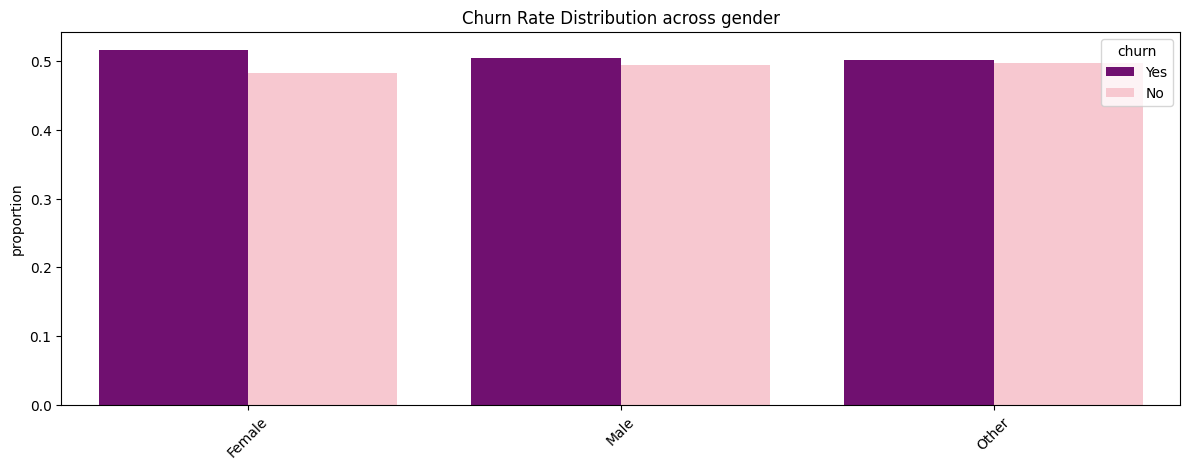

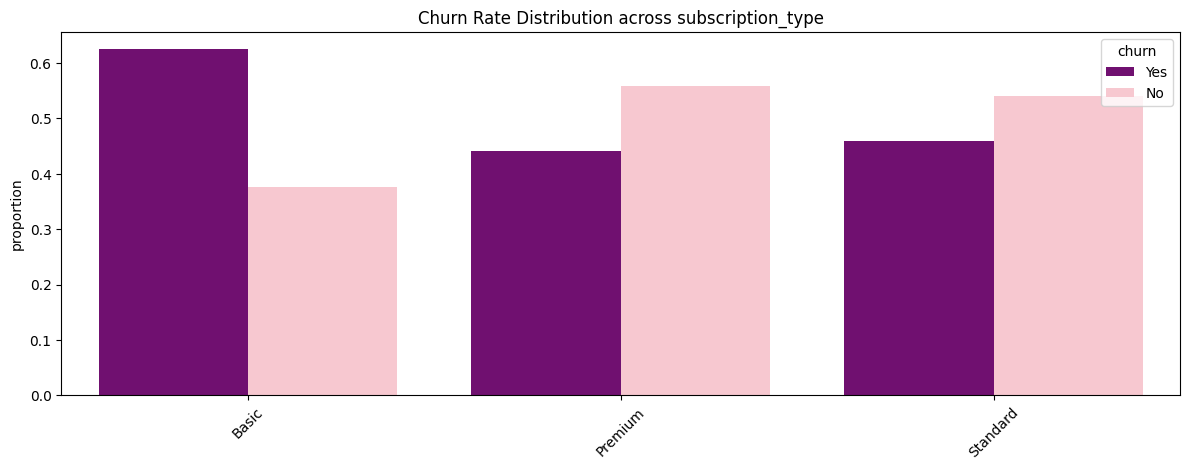

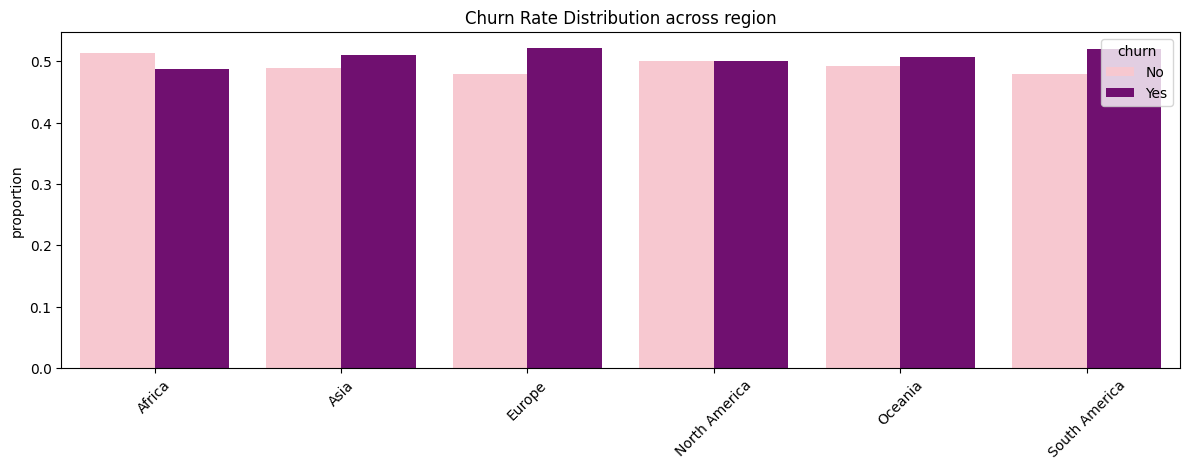

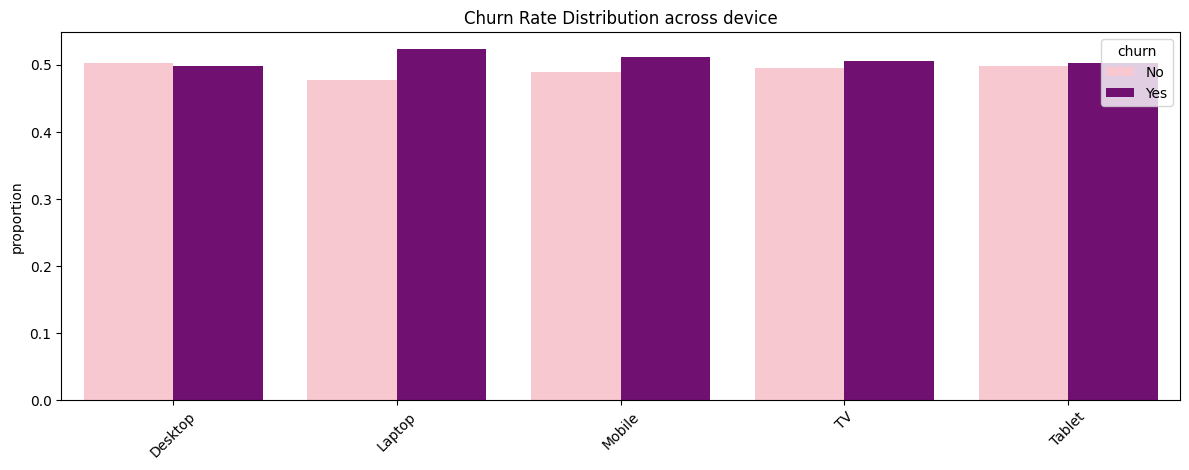

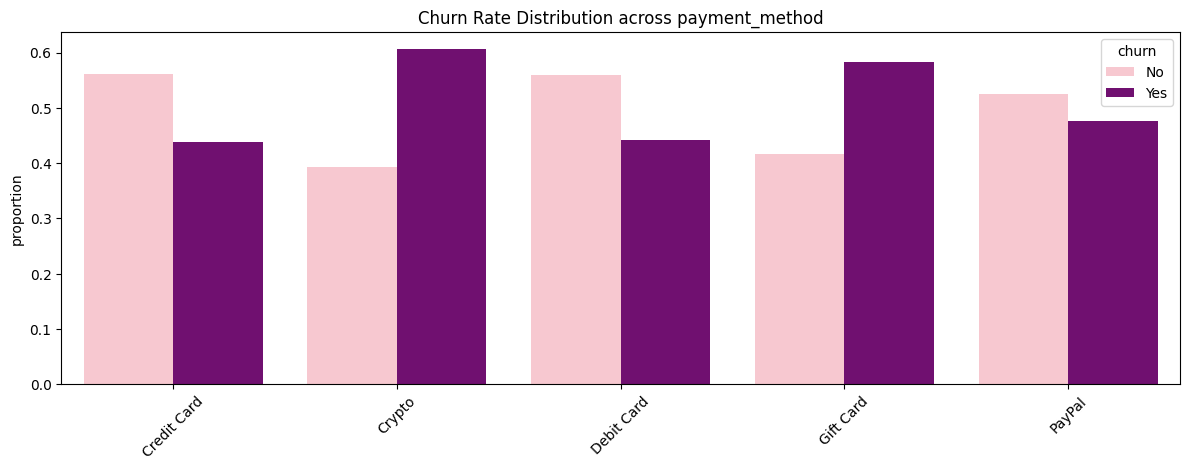

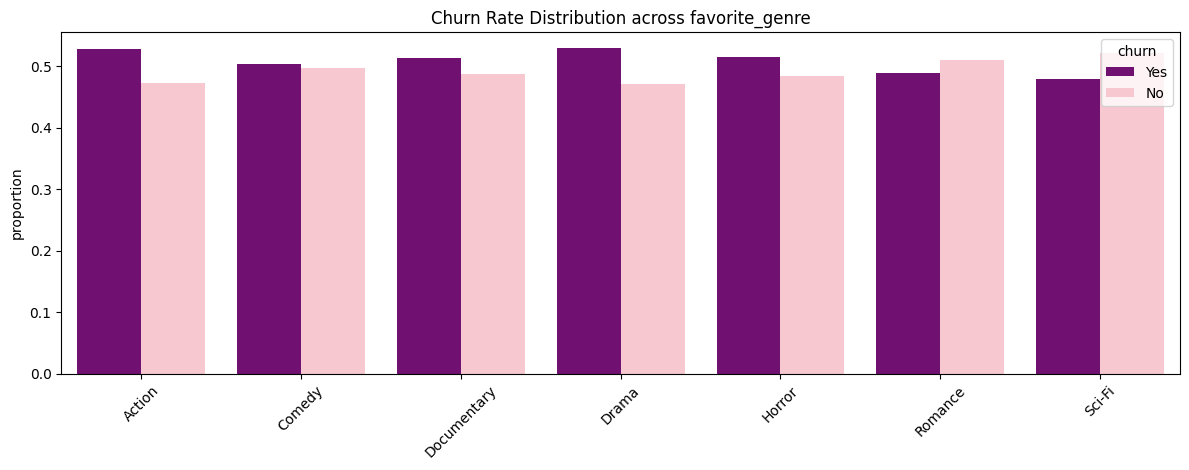

In [ ]:

## finding churn rate distribution across various categories
colors ={'Yes': 'purple', 'No':'pink'}
for col in cat_variables:
  if col != 'churn':
    df_group = df_cus.groupby([col])['churn'].value_counts(normalize=True).reset_index(name='proportion')
    plt.figure(figsize=(12,5))
    sns.barplot(x=col, y='proportion', hue='churn', data =df_group, palette=colors)
    plt.xticks(rotation=45)
    plt.title('Churn Rate Distribution across {}'.format(col))
    plt.tight_layout()
    plt.xlabel('')
    plt.show()

## Insights
Churned customers
1. Individuals with basic subscription have churned higher
2. Individuals whose payment method is crypto followed by gift card are high churners

Retained customers

1. Individuals with a premium subscription have a higher retention proportion.
2. Customers using Debit and credit cards as a payment method retain higher.


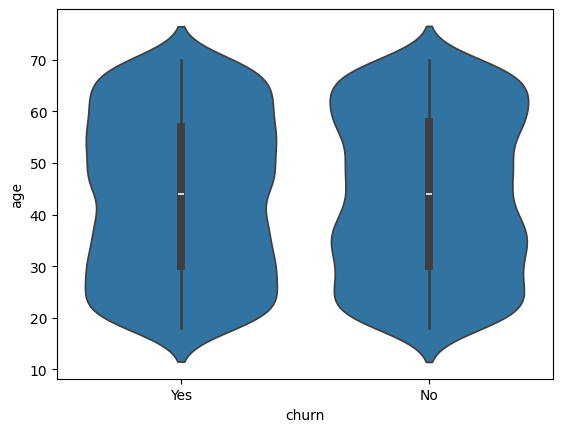

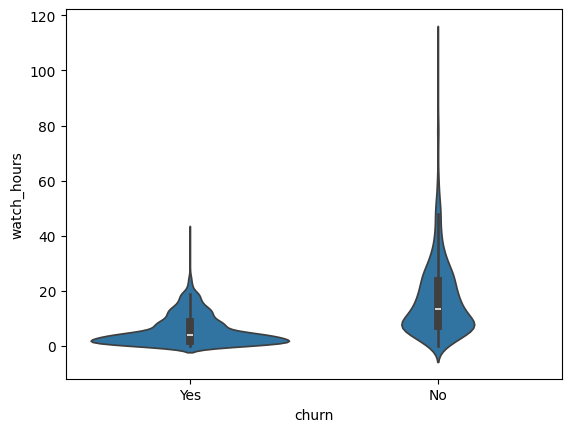

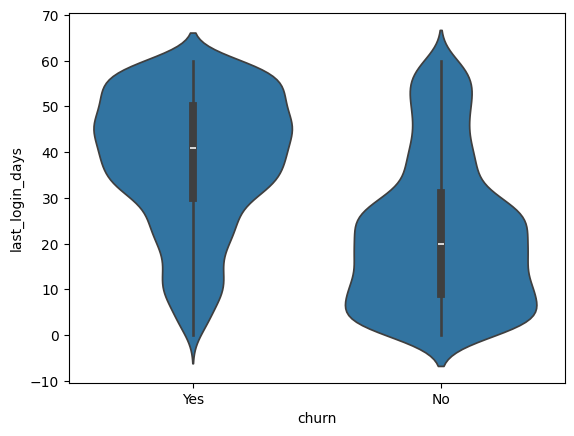

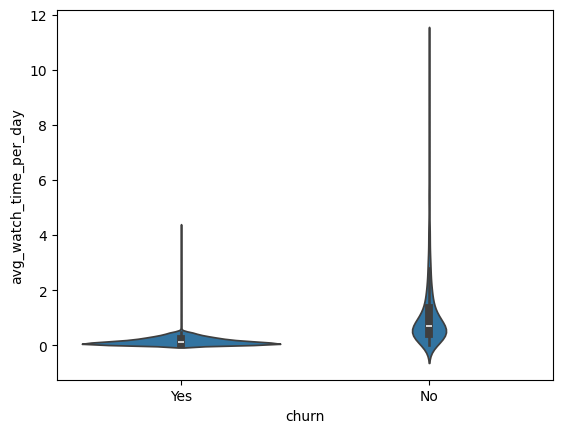

In [ ]:
for col in num_variables:
  if (col !='monthly_fee') and (col !='number_of_profiles'):
    sns.violinplot(x='churn', y=col, data=df_cus)
    plt.show()


In [ ]:
screens = df_cus.groupby(['number_of_profiles'])['churn'].value_counts(normalize=True).reset_index()
screens

,number_of_profiles,churn,proportion
0,1,Yes,0.591900
1,1,No,0.408100
2,2,Yes,0.581984
3,2,No,0.418016
4,3,Yes,0.581984
5,3,No,0.418016
6,4,No,0.620445
7,4,Yes,0.379555
8,5,No,0.589443
9,5,Yes,0.410557


<Axes: xlabel='number_of_profiles', ylabel='proportion'>

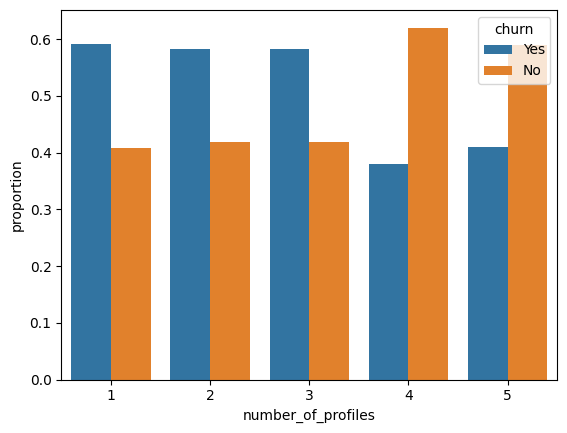

In [ ]:
sns.barplot(x='number_of_profiles', y='proportion', data=screens, hue='churn')

# Insights
1. From the watch_hours and avg_watch_hours_per_Day it is evident that idividuals who churn have lower engagement. The median is almost close to 0 and most of the individuals are concentrated around 0 in churned customers.
2. For churned customers the last login date is up higher compared to non-churned customers.
3. Both churned and non-churned customers have median age between 44-46. Most of them are evenly distributed. This can be further check with regards to gender.
4. Individuals with screen up to 3 or below are more likely to churn compared to 4 to 5. This could be further checked with subscription type

## Multivariant Analysis

In [ ]:
num_var = num_variables
num_var

['age',
 'watch_hours',
 'last_login_days',
 'monthly_fee',
 'number_of_profiles',
 'avg_watch_time_per_day']

In [ ]:
num_var.remove( 'monthly_fee')
num_var.remove(  'number_of_profiles')

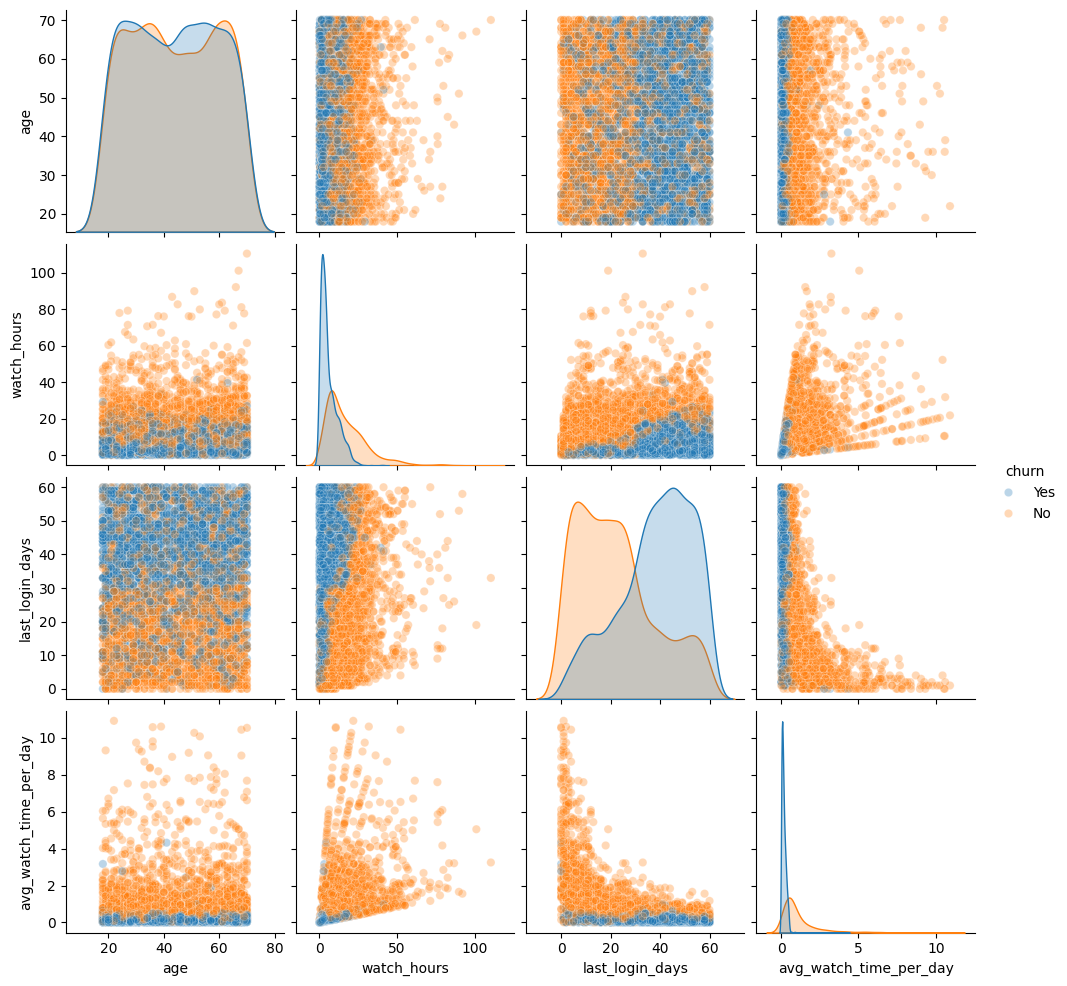

In [ ]:
sns.pairplot(df_cus[num_var + ['churn']], hue='churn', plot_kws={'alpha': 0.3})

## Insights
1. There is a clear distinction between the watch hours , average watch time per day and the last login days. This indicates the lack of engagment and  activity suggest high churning.

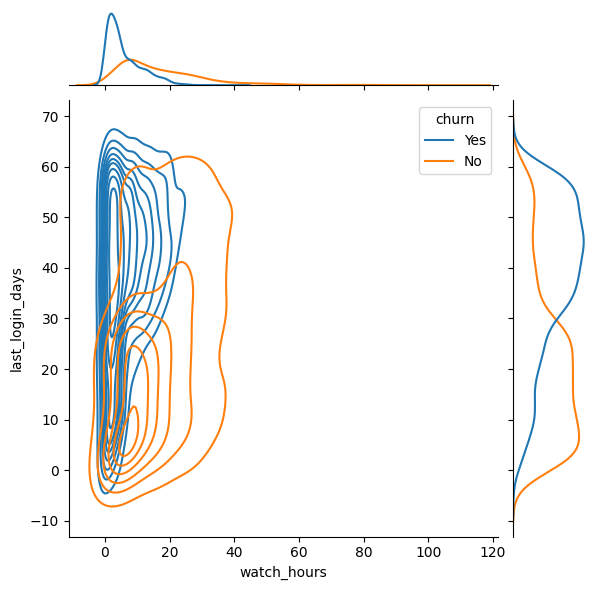

In [ ]:
sns.jointplot(data=df_cus, x='watch_hours', y='last_login_days',hue='churn',  kind='kde')

## Multivariant Analysis:

Based on the previous plots it is evident that watch time, avg watch time per day and last login have a direct impact on churn.

Other columns such as age, genre , device, region, gender do not show direct impact on churn in bivariant analysis.

<Axes: ylabel='Frequency'>

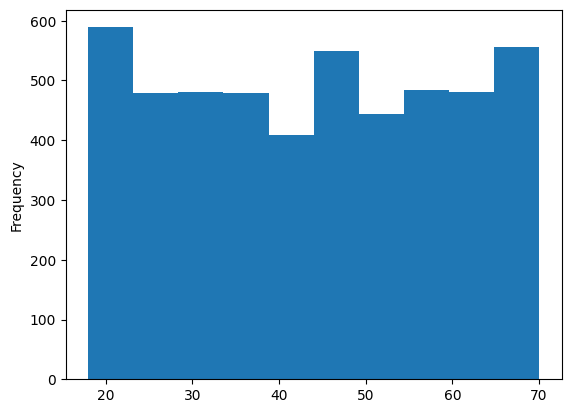

In [ ]:
#starting with age and gender
df_cus['age'].plot(kind='hist')



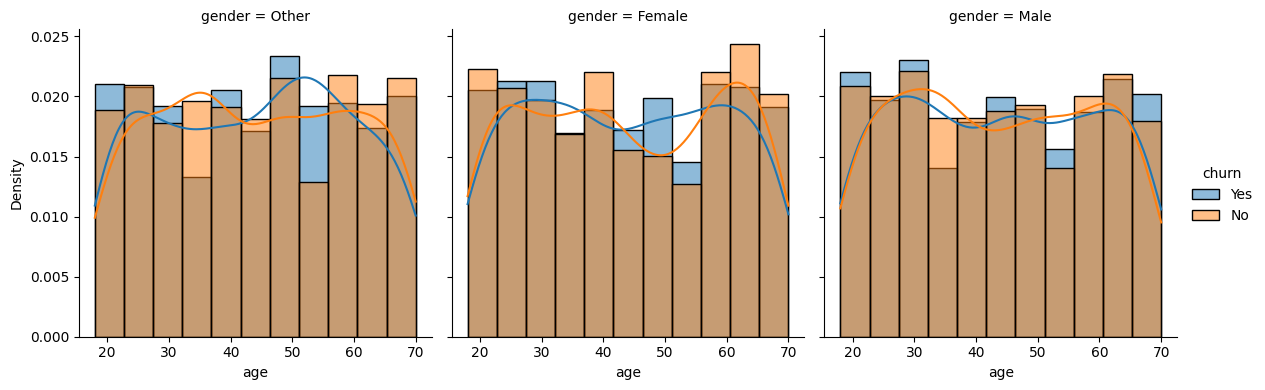

In [ ]:
g = sns.FacetGrid(df_cus, col='gender', hue='churn', height=4)
g.map(sns.histplot, 'age', kde=True, stat='density', common_norm=False).add_legend()

In [ ]:

## try creating age groups
bins = [17,31,45,59,73]
pd.cut(df_cus['age'], bins =bins, labels=['Young Adults(17-30)','Mid-Age Adults(31-44)','Older Adults(45-58)','Senior Adults(59-70)']).value_counts().sort_index()

,count
age,
Young Adults(17-30),1362
Mid-Age Adults(31-44),1244
Older Adults(45-58),1307
Senior Adults(59-70),1037


In [ ]:
df_cus['age_group'] = pd.cut(df_cus['age'], bins =bins, labels=['Young Adults(17-30)','Mid-Age Adults(31-44)','Older Adults(45-58)','Senior Adults(59-70)'])
df_cus.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churn,age_group
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Gift Card,1,0.49,Action,Yes,Older Adults(45-58)
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Gift Card,5,0.03,Sci-Fi,Yes,Older Adults(45-58)
2,27,Female,Standard,16.32,10,Asia,TV,13.99,Crypto,2,1.48,Drama,No,Young Adults(17-30)
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Crypto,2,0.35,Horror,Yes,Older Adults(45-58)
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Crypto,2,0.13,Action,Yes,Older Adults(45-58)


In [ ]:
gen_age_churn = df_cus.groupby(['gender','age_group'])['churn'].value_counts(normalize=True).reset_index(name='proportion')
gen_age_churn

/tmp/ipython-input-36-3821768459.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_age_churn = df_cus.groupby(['gender','age_group'])['churn'].value_counts(normalize=True).reset_index(name='proportion')


,gender,age_group,churn,proportion
0,Female,Young Adults(17-30),Yes,0.518047
1,Female,Young Adults(17-30),No,0.481953
2,Female,Mid-Age Adults(31-44),Yes,0.503464
3,Female,Mid-Age Adults(31-44),No,0.496536
4,Female,Older Adults(45-58),Yes,0.549763
5,Female,Older Adults(45-58),No,0.450237
6,Female,Senior Adults(59-70),No,0.505495
7,Female,Senior Adults(59-70),Yes,0.494505
8,Male,Young Adults(17-30),Yes,0.510776
9,Male,Young Adults(17-30),No,0.489224


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


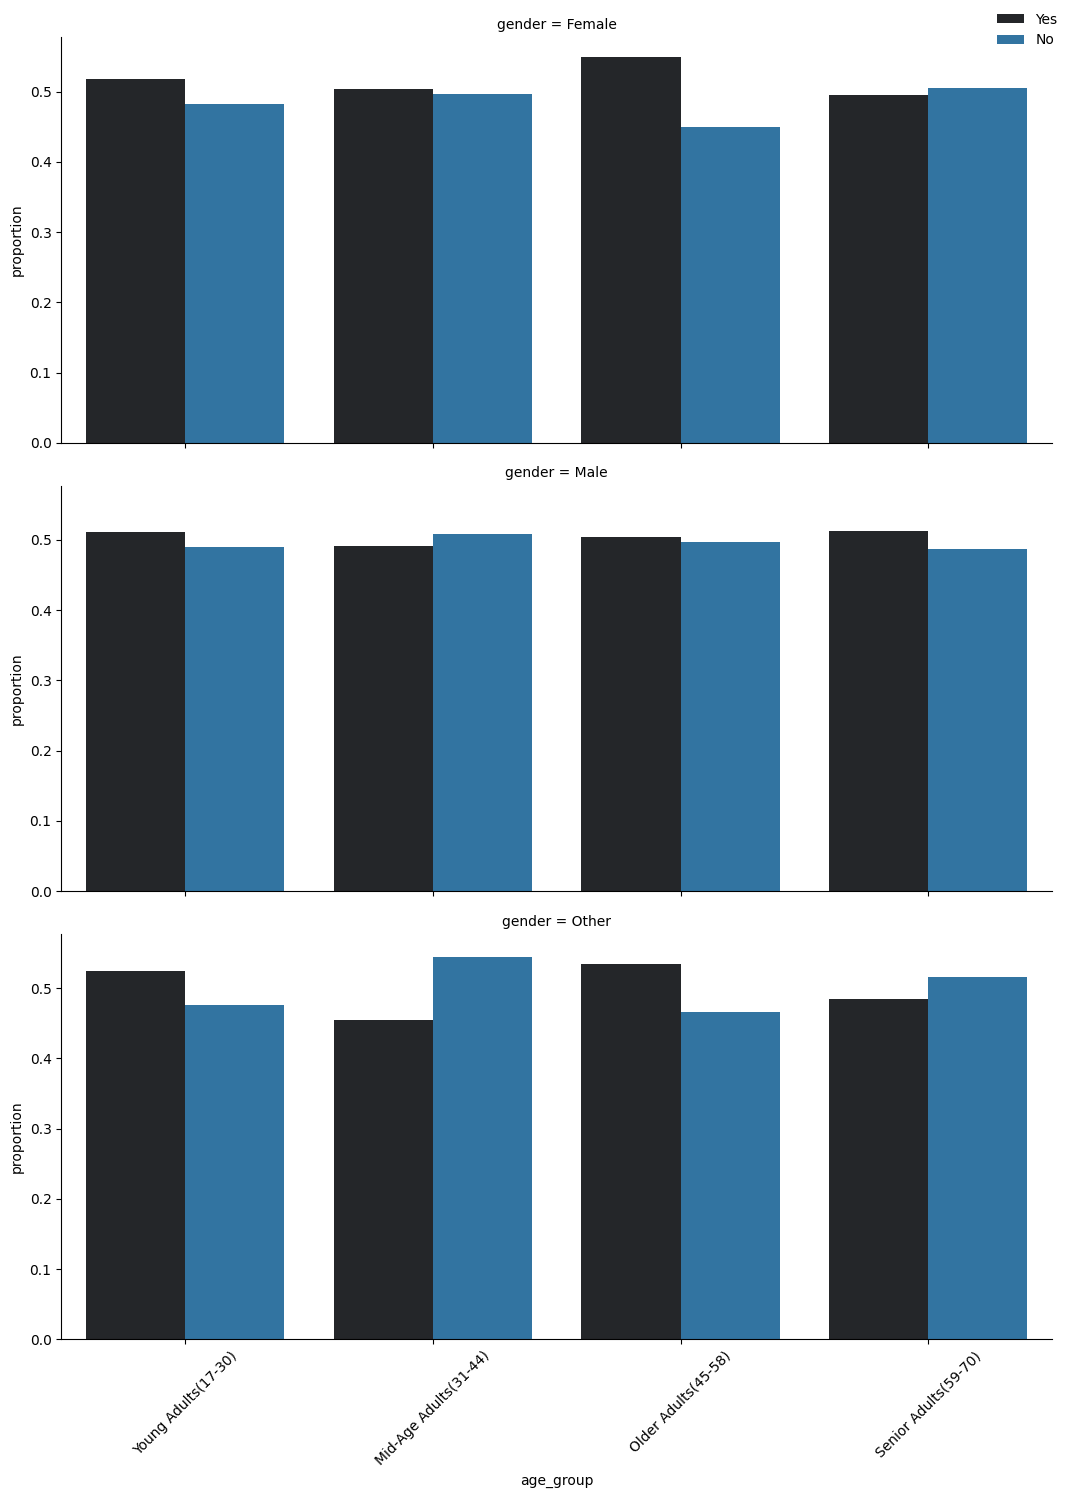

In [ ]:
g= sns.FacetGrid(gen_age_churn, row='gender', height= 5 , aspect= 2)
g.map_dataframe(sns.barplot, x='age_group', y='proportion', hue='churn')
g.add_legend()
g._legend.set_loc('upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### slightly higher churn is observed in Female and Males of age group (45-58)

In [ ]:
piv_churn = df_cus.pivot_table(index='gender', columns='favorite_genre', values= 'churn' , aggfunc=lambda x: (x =='Yes').mean())
piv_churn

favorite_genre,Action,Comedy,Documentary,Drama,Horror,Romance,Sci-Fi
gender,,,,,,,
Female,0.510204,0.521186,0.481172,0.566372,0.517094,0.551440,0.479401
Male,0.528139,0.445498,0.531381,0.539924,0.495902,0.493213,0.486957
Other,0.546296,0.536481,0.526749,0.480687,0.534188,0.426295,0.469194


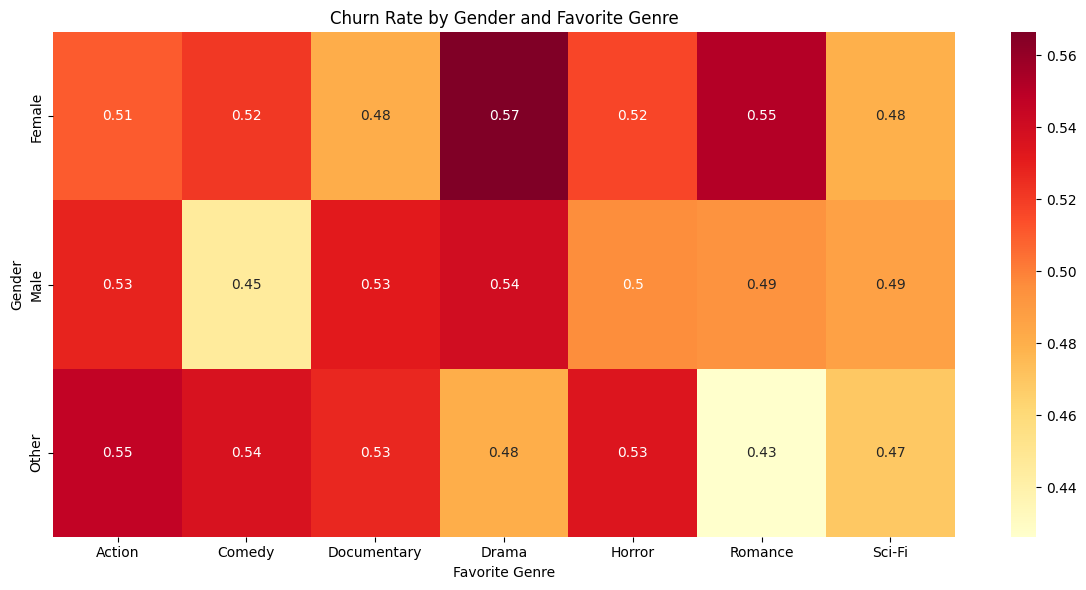

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(piv_churn, annot=True,  cmap='YlOrRd')
plt.title("Churn Rate by Gender and Favorite Genre")
plt.xlabel("Favorite Genre")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

## Femlaes who whose favorite genre is Drama churn  more


In [ ]:
piv = df_cus.pivot_table(index='region', columns=['gender','age_group'], values= 'churn' , aggfunc=lambda x: (x =='Yes').mean())
piv

/tmp/ipython-input-40-555196681.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df_cus.pivot_table(index='region', columns=['gender','age_group'], values= 'churn' , aggfunc=lambda x: (x =='Yes').mean())


gender                     Female                                            \
age_group     Young Adults(17-30) Mid-Age Adults(31-44) Older Adults(45-58)   
region                                                                        
Africa                   0.500000              0.430380            0.500000   
Asia                     0.500000              0.507042            0.575342   
Europe                   0.580247              0.569444            0.571429   
North America            0.459770              0.478261            0.619718   
Oceania                  0.531646              0.506329            0.508772   
South America            0.535714              0.539683            0.512195   

gender                                            Male                        \
age_group     Senior Adults(59-70) Young Adults(17-30) Mid-Age Adults(31-44)   
region                                                                         
Africa                    0.451613            0.500000              0.478261   
Asia                      0.500000            0.527027              0.569444   
Europe                    0.453125            0.506667              0.473684   
North America             0.492063            0.452381              0.484848   
Oceania                   0.520833            0.567568              0.456140   
South America             0.546667            0.516854              0.478873   

gender                                                               Other  \
age_group     Older Adults(45-58) Senior Adults(59-70) Young Adults(17-30)   
region                                                                       
Africa                   0.532258             0.508772            0.444444   
Asia                     0.391892             0.425926            0.585366   
Europe                   0.500000             0.571429            0.522388   
North America            0.513514             0.451613            0.594595   
Oceania                  0.548387             0.576923            0.484848   
South America            0.550725             0.543860            0.500000   

gender                                                                        
age_group     Mid-Age Adults(31-44) Older Adults(45-58) Senior Adults(59-70)  
region                                                                        
Africa                     0.515152            0.567568             0.418182  
Asia                       0.449275            0.530120             0.533333  
Europe                     0.414286            0.602941             0.485294  
North America              0.433333            0.519481             0.482143  
Oceania                    0.415385            0.493151             0.465116  
South America              0.500000            0.505495             0.521739

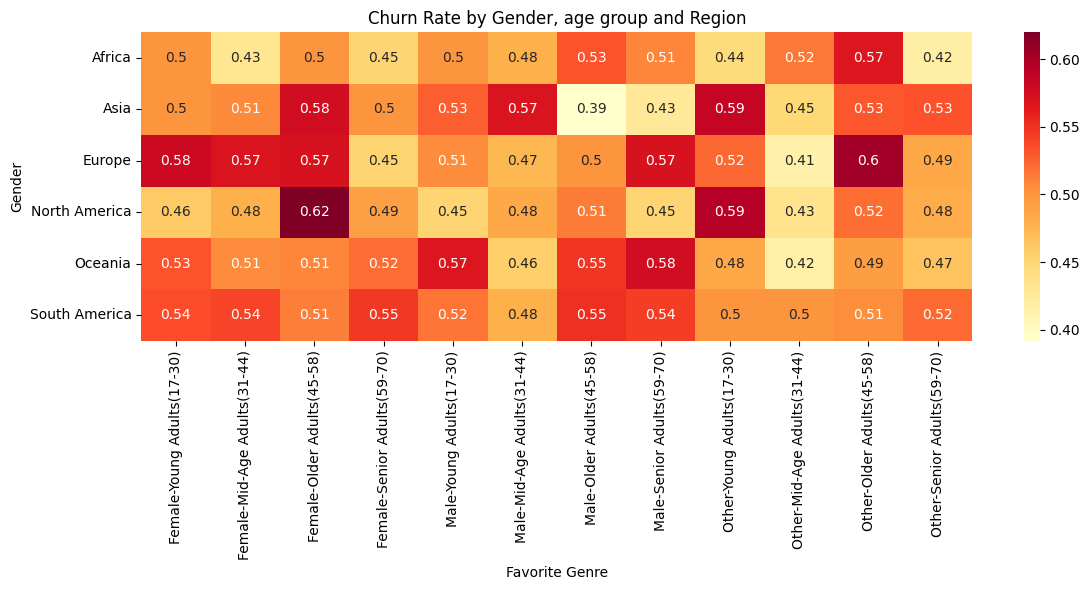

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(piv, annot=True,  cmap='YlOrRd')
plt.title("Churn Rate by Gender, age group and Region")
plt.xlabel("Favorite Genre")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

# Insights
High churn observed in
1. 62% of females of age group (45-58) who in North America.
2. 60% of Others of age group(45-58) who live in Europe


In [ ]:
churn_cus = df_cus[df_cus['churn']=='Yes']
cross_tab = pd.crosstab(index = churn_cus['device'], columns =churn_cus['gender'],normalize='index')
cross_tab

gender,Female,Male,Other
device,,,
Desktop,0.340471,0.314775,0.344754
Laptop,0.372361,0.310940,0.316699
Mobile,0.307692,0.368836,0.323471
TV,0.360887,0.310484,0.328629
Tablet,0.354962,0.337786,0.307252


<Axes: xlabel='device'>

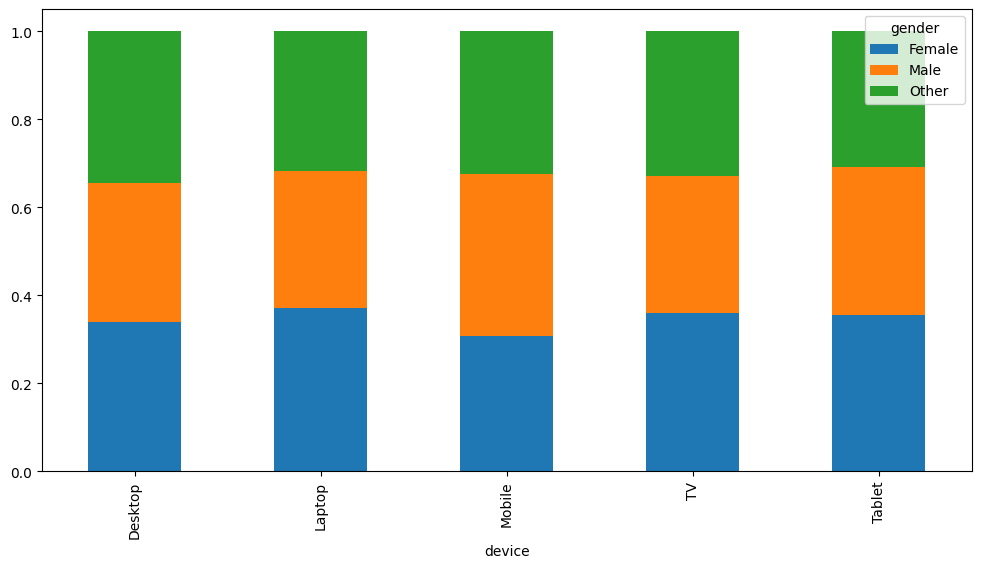

In [ ]:
cross_tab.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)


In [ ]:
df_cus.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre',
       'churn', 'age_group'],
      dtype='object')

In [ ]:

num_variables.append('number_of_profiles')

In [ ]:
num_variables.append('churn_flag')

In [ ]:
df_cus.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churn,age_group
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Gift Card,1,0.49,Action,Yes,Older Adults(45-58)
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Gift Card,5,0.03,Sci-Fi,Yes,Older Adults(45-58)
2,27,Female,Standard,16.32,10,Asia,TV,13.99,Crypto,2,1.48,Drama,No,Young Adults(17-30)
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Crypto,2,0.35,Horror,Yes,Older Adults(45-58)
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Crypto,2,0.13,Action,Yes,Older Adults(45-58)


In [ ]:
df_cus['churn_flag'] = df_cus['churn'].replace({'Yes':1,'No':0})

/tmp/ipython-input-50-1576074572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cus['churn_flag'] = df_cus['churn'].replace({'Yes':1,'No':0})


In [ ]:
corr_churn = df_cus[num_variables].corr()['churn_flag'].sort_values(ascending=False)
corr_churn

,churn_flag
churn_flag,1.000000
last_login_days,0.463541
age,-0.002840
number_of_profiles,-0.160152
avg_watch_time_per_day,-0.444021
watch_hours,-0.478051


In [ ]:
corr_churn.index

Index(['churn_flag', 'last_login_days', 'age', 'number_of_profiles',
       'avg_watch_time_per_day', 'watch_hours'],
      dtype='object')

/tmp/ipython-input-53-1777699789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


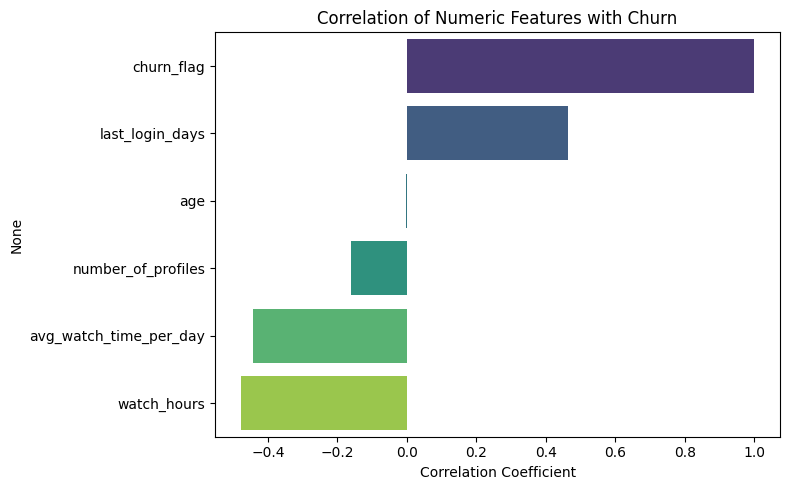

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=corr_churn.values,
    y=corr_churn.index,
    palette='viridis',
    orient='h'
)
plt.title("Correlation of Numeric Features with Churn")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

## Insights :
Correlation works with mostly with numeric data, create dunmmies for categorical values
1. Positive correlation is observed in last login day and negative correlation is observed in number_of_profiles, avg_watch_time and watch_hour


In [ ]:
df_encoded = pd.get_dummies(df_cus, drop_first=True)
correlations = df_encoded.corr()['churn_flag'].sort_values(ascending=False)
correlations

,churn_flag
churn_Yes,1.000000
churn_flag,1.000000
last_login_days,0.463541
payment_method_Crypto,0.097988
payment_method_Gift Card,0.073536
age_group_Older Adults(45-58),0.025611
favorite_genre_Drama,0.017362
device_Laptop,0.014553
region_Europe,0.012333
region_South America,0.011211


/tmp/ipython-input-55-541399754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


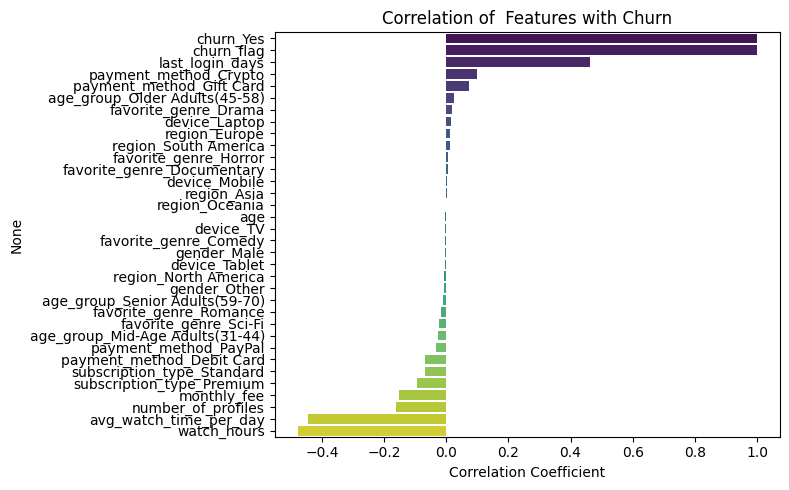

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=correlations.values,
    y=correlations.index,
    palette='viridis'
)
plt.title("Correlation of  Features with Churn")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()